In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

## Explore the dataset

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

iso_code                                        0
continent                                   16970
location                                        0
date                                            0
total_cases                                 38198
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       343443
excess_mortality_cumulative                343443
excess_mortality                           343443
excess_mortality_cumulative_per_million    343443
Length: 67, dtype: int64

In [ ]:
## Descriptive Analysis

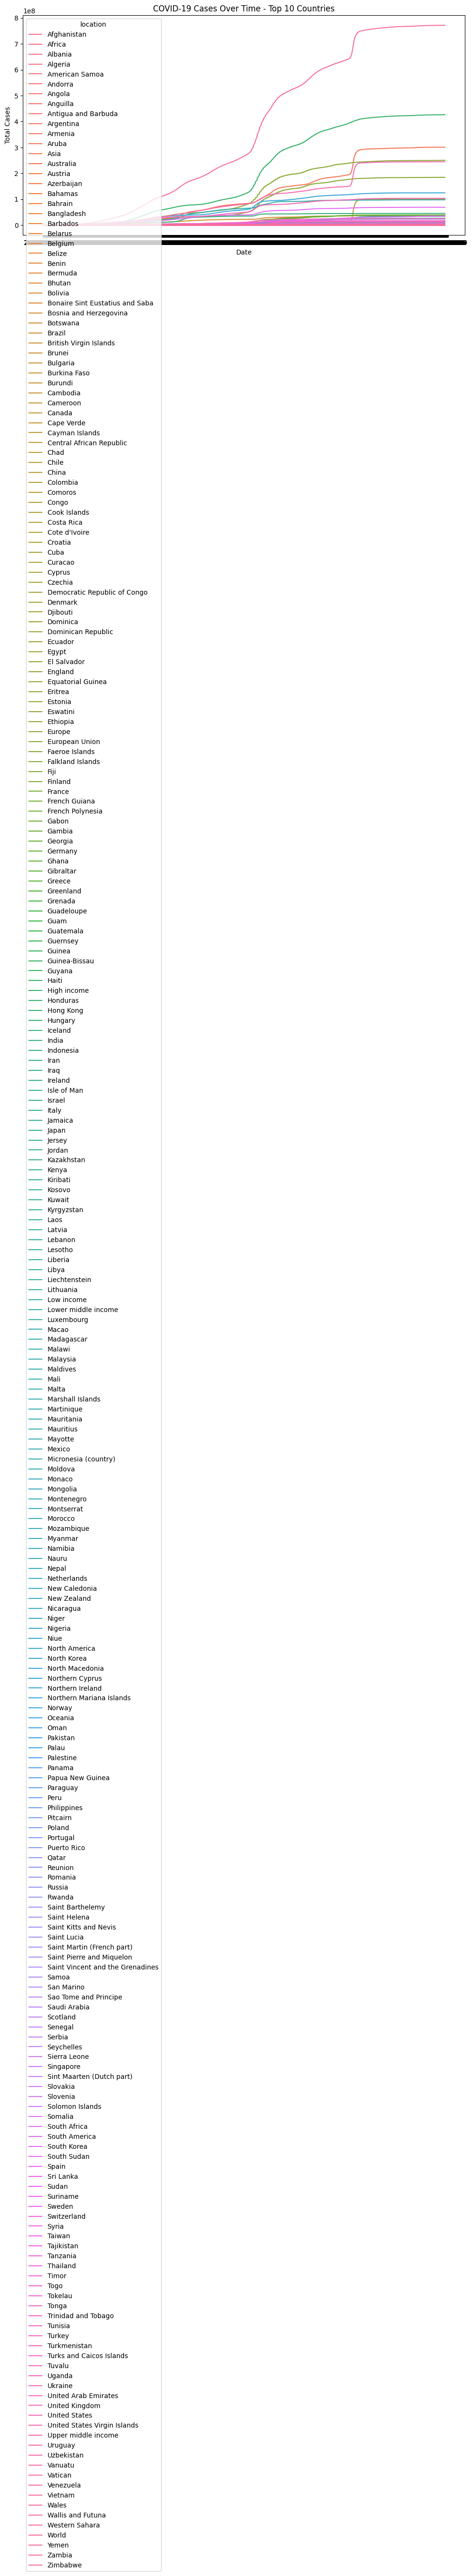

In [11]:
country_cases = df.groupby('location')['total_cases'].max().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_cases', data=df[df['location'].isin(country_cases.index)], hue='location', errorbar=None)
plt.title('COVID-19 Cases Over Time - Top 10 Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

In [ ]:
## Time trends

In [17]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [32]:
country = 'France'
country_df = df[df['location'] == country].copy()

In [ ]:
## Data prepaaton 

In [33]:
# Convert date column to datetime
country_df['date'] = pd.to_datetime(country_df['date'])

# Calculate daily new cases
country_df['new_cases'] = country_df['total_cases'].diff().fillna(0)

In [20]:
print(country_df[['total_cases', 'new_cases']])

        total_cases  new_cases
334733          NaN        0.0
334734          NaN        0.0
334735          NaN        0.0
334736          NaN        0.0
334737          NaN        0.0
...             ...        ...
336135  103436829.0        0.0
336136  103436829.0        0.0
336137  103436829.0        0.0
336138  103436829.0        0.0
336139  103436829.0        0.0

[1407 rows x 2 columns]


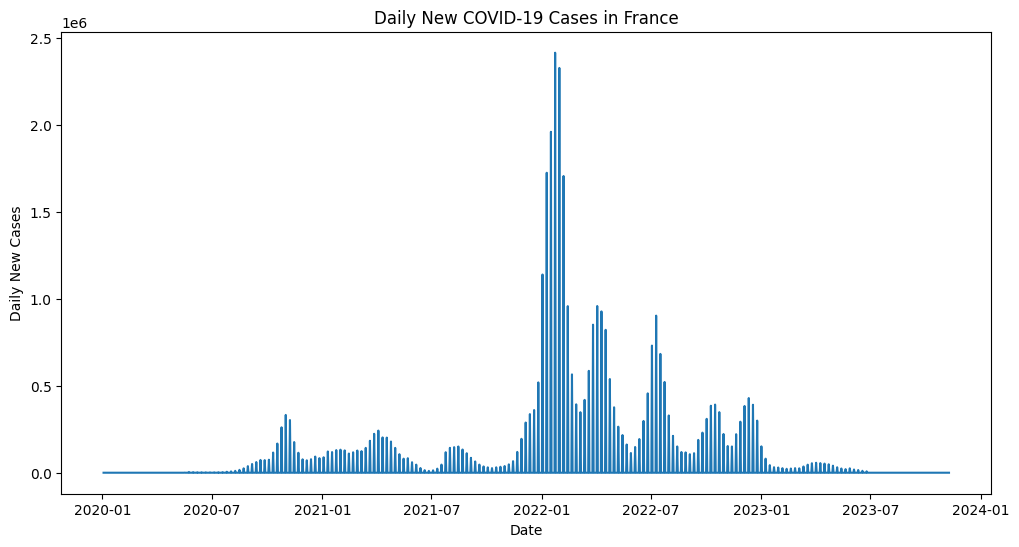

In [34]:
# Time trends analysis

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', data=country_df, errorbar=None)
plt.title(f'Daily New COVID-19 Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.show()